# Path finding for an Single-Order Picking Robot in a Distribution Center with Genetic Algorithm

Consider an e-commerce company has a distribution center, and the company would like all of the picking operations in the center to be performed by warehouse robots.
* In the context of e-commerce warehousing, “picking” is the task of gathering individual items from various locations in the warehouse in order to fulfill customer orders.

In order to ensure maximum efficiency and productivity, the robots will need to learn the shortest path between the item packaging area and all other locations within the warehouse where the robots are allowed to travel.
* We will use Genetic algorithm to accomplish this task!

#### Import Required Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm

## Define the Environment
We define the layout of the warehouse environment, including aisle locations, item and robot starting points, shelf locations, and the visualization grid.

The squares in the environment are all of the possible locations within the warehouse. Some of these locations are for storing items (**gray squares**), while other locations are aisles that the robot can use to travel throughout the warehouse (**white squares**). The **green square** indicates the item loaction.

The goal is to learn the shortest path between the item location and all of the other locations in the warehouse where the robot is allowed to travel.

As shown in the image below, there are 121 possible locations within the warehouse (11 rows and 11 columns). Each location can hence be identified by its row and column index.

In [33]:
# Define aisle locations
aisles = {
    0: [],
    1: [i for i in range(1,10)],
    2: [1, 5, 9],
    3: [1, 5, 9],
    4: [i for i in range(1,10)],
    5: [1, 5, 9],
    6: [i for i in range(1,10)],
    7: [1, 5, 9],
    8: [1, 5, 9],
    9: [i for i in range(1,10)],
    10: []
}
# Define item and robot starting points
item_location = (5,7)
robot_start = (1, 5)  # Starting point for the robot
robot_end = (5,7)    # Ending point for the robot
 
# Shelf locations
shelves = []
for row, cols in aisles.items():
    for col in cols:
        if (row, col) != robot_start and (row, col) != robot_end:
            shelves.append((row, col))
            

### Visualization of Warehouse Environment
Let's visualize the warehouse environment with shelves, starting point, and item location.

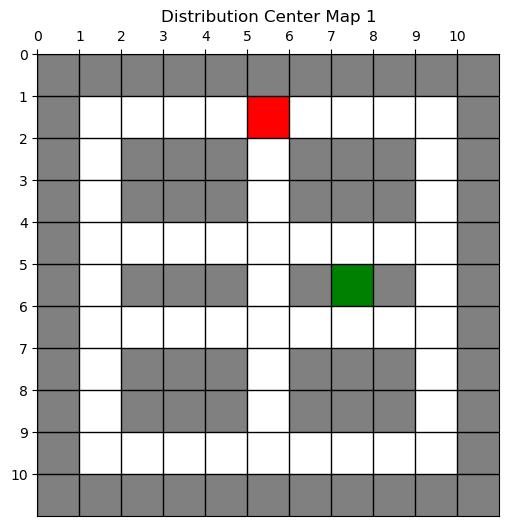

In [34]:
# Define custom colors for visualization
colors = ['gray', 'white','red', 'green']
cmap = ListedColormap(colors)

# Plot the environment
plt.figure(figsize=(6, 6))

# Let the horizontal axes labeling appear on top
ax = plt.gca()
ax.xaxis.tick_top()

plt.imshow(grid, cmap=cmap, origin='upper', vmin=0, vmax=3)

plt.xticks(np.arange(11)-0.5, np.arange(11))
plt.yticks(np.arange(11)-0.5, np.arange(11))
plt.title("Distribution Center Map 1")
plt.grid(True, color='black', linewidth=1)

# Display the plot
plt.show()

### Genetic Algorithm Constants and Fitness Function
We set the constants for the genetic algorithm and define a function to calculate the fitness of a given path.

In [35]:
# Genetic Algorithm Constants
POPULATION_SIZE = 700
NUM_GENERATIONS = 2500
MUTATION_RATE = 0.4

In [36]:
# Function to calculate the fitness of a path
def calculate_fitness(path):
    current_pos = robot_start
    path_cost = 0
    for move in path:
        new_pos = (current_pos[0] + move_directions[move][0], current_pos[1] + move_directions[move][1])
        if new_pos[0] >= 0 and new_pos[0] < 11 and new_pos[1] >= 0 and new_pos[1] < 11 and new_pos not in aisles.values():
            if new_pos not in shelves:  # Check if the new position is not a shelf
                path_cost += 1
            current_pos = new_pos
            if current_pos == robot_end:  # Reached the destination
                return path_cost
        else:
            return float('inf')  # Avoid paths that hit walls or shelves
    return float('inf')


#### Actions
The actions that are available are to move the robot in one of four directions:
* Up
* Right
* Down
* Left

In [37]:
# Define move directions (0 = up, 1 = right, 2 = down, 3 = left)
move_directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]

## Genetic Algorithm Implementation
We implement the genetic algorithm to find the shortest path.

In [38]:
# Genetic algorithm
population = [np.random.randint(4, size=np.random.randint(10, 50)) for _ in range(POPULATION_SIZE)]

robot_start = (1, 5)  # Starting point for the robot
robot_end = (5,7)    # Ending point for the robot

# Use tqdm to create a progress bar for the loop
for generation in tqdm(range(NUM_GENERATIONS)):
    # Calculate fitness for each individual
    fitness_values = [calculate_fitness(path) for path in population]

    # Select parents based on fitness
    selected_indices = np.argsort(fitness_values)[:2]  # Select the top 2 paths
    parents = [population[i] for i in selected_indices]

    # Crossover
    crossover_point = np.random.randint(1, min(len(parents[0]), len(parents[1])))
    child = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))

    # Mutation
    if np.random.rand() < MUTATION_RATE:
        mutation_point = np.random.randint(len(child))
        mutation_value = np.random.randint(4)
        child[mutation_point] = mutation_value

    # Replace the least fit individual with the new child
    least_fit_index = np.argmax(fitness_values)
    population[least_fit_index] = child

100%|██████████| 2500/2500 [00:10<00:00, 242.07it/s]


## Finding the Shortest Path
We find the shortest path using the genetic algorithm and convert it to coordinate format.

In [39]:
# Find the shortest path using genetic algorithm
best_path = population[np.argmin(fitness_values)]

# Convert best path to coordinate format
coordinate_path = [list(robot_start)]
current_pos = robot_start
for move in best_path:
    new_pos = (current_pos[0] + move_directions[move][0], current_pos[1] + move_directions[move][1])
    if new_pos[0] >= 0 and new_pos[0] < 11 and new_pos[1] >= 0 and new_pos[1] < 11 and new_pos not in aisles.values():
        coordinate_path.append(list(new_pos))
        current_pos = new_pos
        if current_pos == robot_end:
            break

# Print the shortest path in the requested format
print(coordinate_path)

[[1, 5], [2, 5], [3, 5], [4, 5], [4, 6], [4, 7], [5, 7]]


## Visualization of Shortest Path
Let's visualize the warehouse environment with shelves, starting point, item location, and the calculated shortest path.

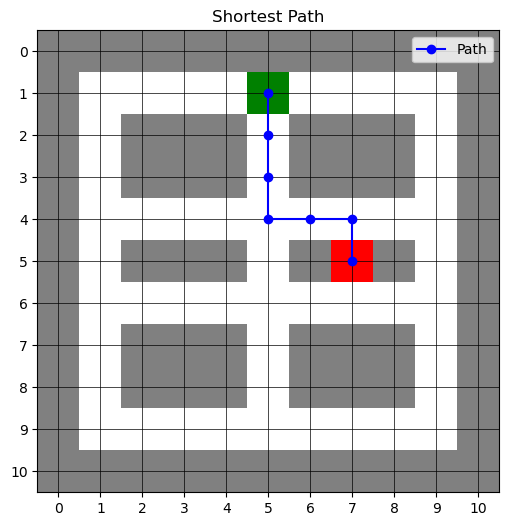

In [40]:
# Plot the environment, shelves, and path
colors = ['gray', 'white', 'green', 'red']
cmap = ListedColormap(colors)

grid = np.zeros((11, 11))
for row in aisles:
    for col in aisles[row]:
        grid[row, col] = 0.5
for shelf in shelves:
    grid[shelf[0], shelf[1]] = 1  # Shelf location
grid[robot_start[0], robot_start[1]] = 2  # Starting point
grid[robot_end[0], robot_end[1]] = 3      # Ending point

plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap=cmap, origin='upper', vmin=0, vmax=3)
plt.xticks(range(11))
plt.yticks(range(11))
plt.title("Shortest Path")

path_coords = np.array(coordinate_path)
plt.plot(path_coords[:, 1], path_coords[:, 0], marker='o', color='blue', label='Path')
plt.legend()

plt.grid(True, color='black', linewidth=0.5)
plt.show()